<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/support_vector_regression(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

'''
if we comment out ------> y = y.reshape(len(y),1)
Expected 2D array, got 1D array instead:
array=[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000. 500000. 1000000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
'''


'\nif we comment out ------> y = y.reshape(len(y),1)\nExpected 2D array, got 1D array instead:\narray=[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000. 500000. 1000000.].\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.\n'

In [9]:
print(X)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(X,y)

SVR()

## Predicting a new result

In [12]:
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])).reshape(-1,1)) # reshape (-1,1) was used to avoid format error

array([[170370.0204065]])

## Visualising the SVR results

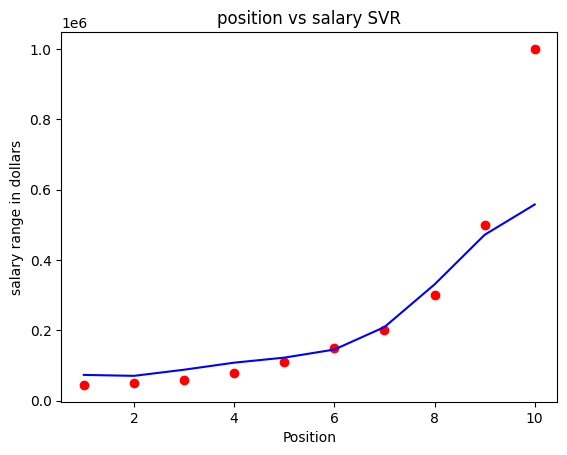

In [14]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = "red")
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(reg.predict(X).reshape(-1,1)),color = "blue")
# sc_X.inverse_transform(X) was used to rescale to original values
# X_train = sc_X.inverse_transform(X)
# y_train = sc_y.inverse_transform(y)
'''
 plt.plot(X,reg.predict(sc_X.transform(X)),color = "blue") -->
 as X is already transformed, we dont need to use sc_X.transform(X) in reg.predict...just use X
 cause the inverse_trans will again convert it ot its original value
 using them will again feature scale them into the graph
'''
plt.title("position vs salary SVR")
plt.xlabel("Position")
plt.ylabel("salary range in dollars")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

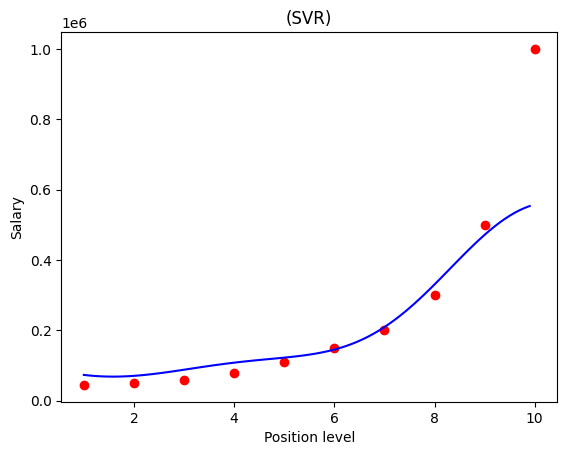

In [15]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = "red")
plt.plot(X_grid,sc_y.inverse_transform(reg.predict(sc_X.transform(X_grid)).reshape(-1,1)),color = "blue")
plt.title('(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

